In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../data/stroke-data-preprocessed.csv", index_col = 0)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.60,0,1
51676,0,61.0,0,0,1,3,0,202.21,31.45,1,1
31112,1,80.0,0,1,1,2,0,105.92,32.50,1,1
60182,0,49.0,0,0,1,2,1,171.23,34.40,2,1
1665,0,79.0,1,0,1,3,0,174.12,24.00,1,1


In [4]:
X = df.drop("stroke", axis=1)

In [5]:
kmeans = KMeans(2)
kmeans.fit(X)
pred_class = kmeans.predict(X)

/home/mahdi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
(sum(pred_class == df.loc[:, "stroke"]) / df.shape[0]) * 100

83.91074574280681

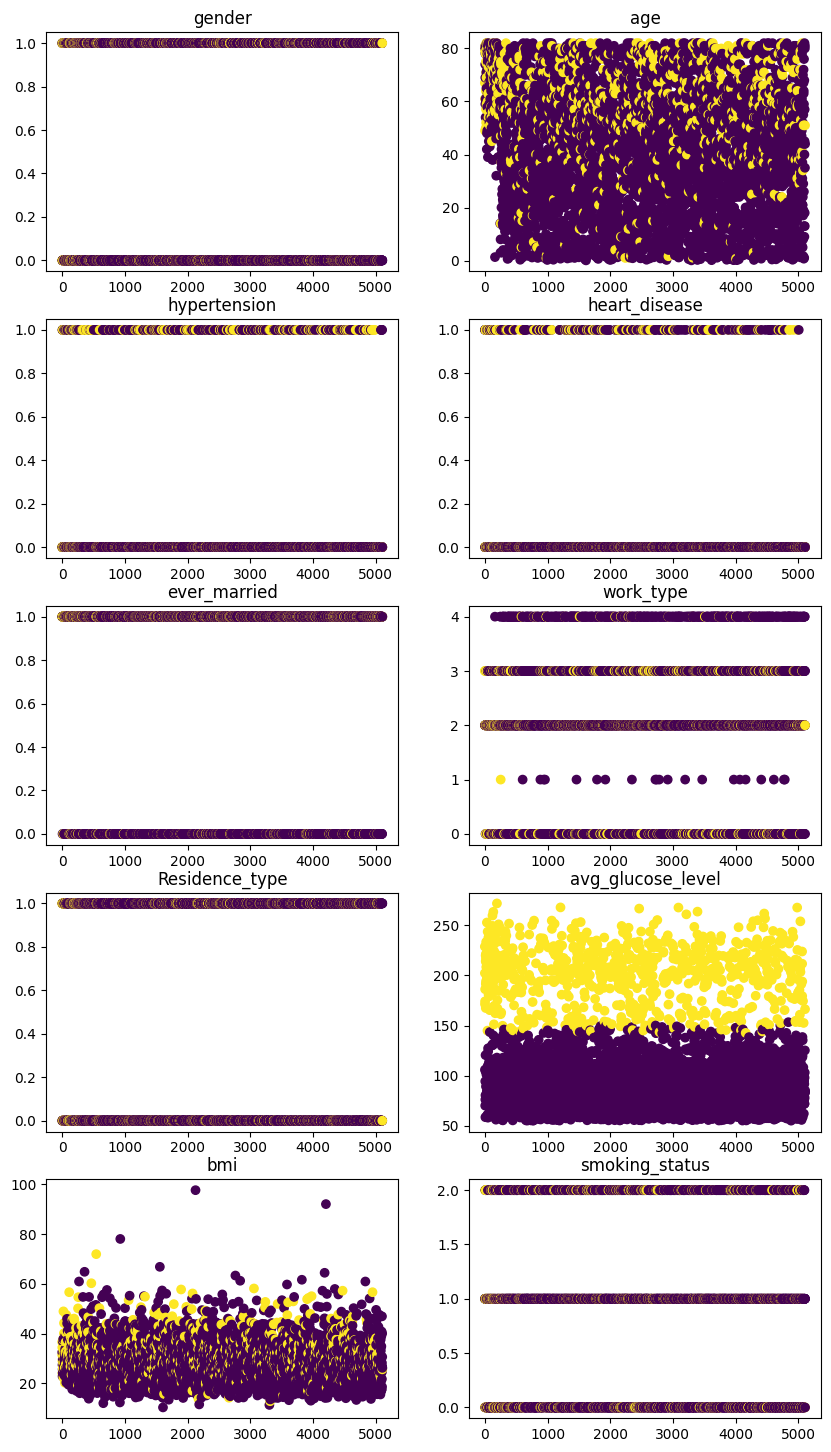

In [7]:
indexes = range(len(X.index))
fig, axs = plt.subplots(5,2, figsize=(10,18))
col = 0
for i in range(5):
    for j in range(2):
        axs[i,j].scatter(indexes, X[X.columns[col]], c=pred_class)
        axs[i,j].set_title(X.columns[col])
        col += 1

In [10]:
pca = PCA(n_components = min(X.shape[0], X.shape[1]))

In [12]:
X_r = pca.fit(X).transform(X)

In [16]:
y = df["stroke"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'PCA')

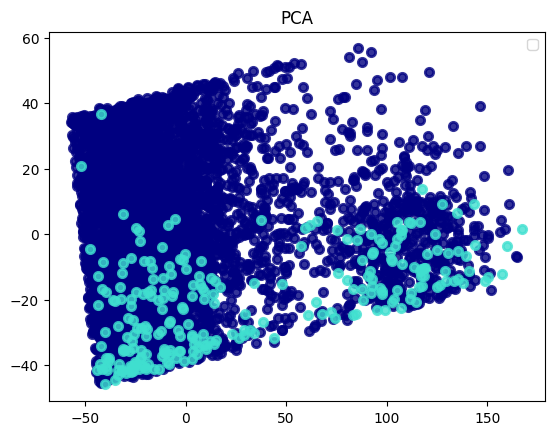

In [17]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA")